In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

importing pilot study data

In [29]:
neat_data_pilot = np.zeros(40)
dqn_data_pilot = np.zeros(40)


with open("experiment_data/pilot_study/NEAT_pilot_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        neat_data_pilot[i] = row[0]
        
with open("experiment_data/pilot_study/DQN_pilot_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        dqn_data_pilot[i] = row[0]


57048.44631854031 704.5573428579111


In [36]:
dqn_minus_neat = np.zeros(40)
with open("experiment_data/pilot_study/DQN_minus_NEAT_pilot_study_data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    for i, value in enumerate(dqn_data_pilot - neat_data_pilot):
        writer.writerow([value])
        dqn_minus_neat[i] = value
        
s = np.std(dqn_minus_neat)
e = 10_000
(1.96**2)*(s**2)/(e**2)


124.21858770646858

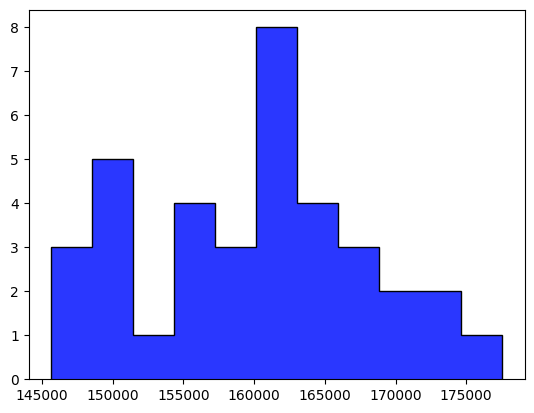

In [27]:
dqn_minus_neat_no_outlaiers = dqn_minus_neat[dqn_minus_neat>130_000]
plt.hist(dqn_minus_neat_no_outlaiers, 11, color="#2a37ff")
plt.hist(dqn_minus_neat_no_outlaiers, 11, histtype="step", color="#000000")
plt.show()



importing study data

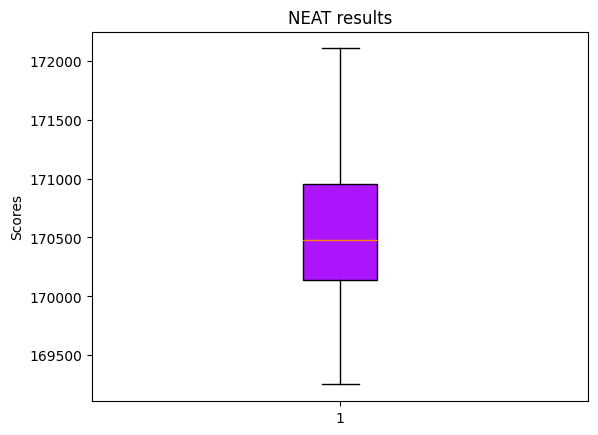

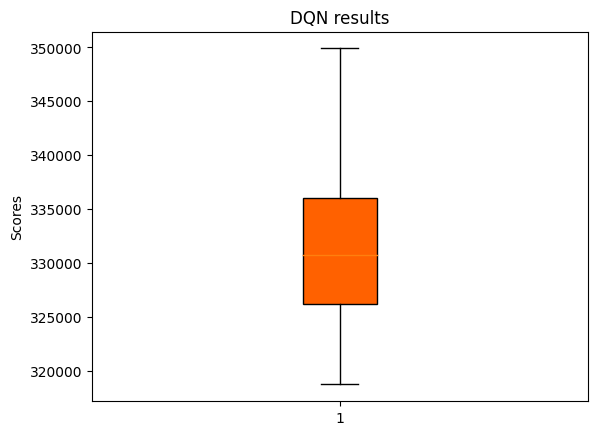

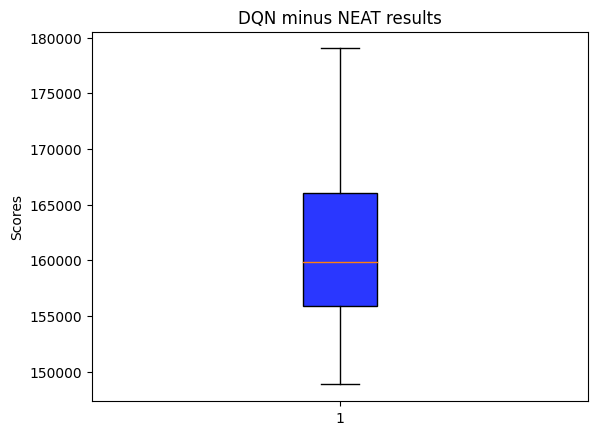

In [68]:
neat_data = np.zeros(125)
dqn_data = np.zeros(125)
y_axis = np.arange(1,126)

with open("experiment_data/study/NEAT_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        neat_data[i] = row[0]
        
with open("experiment_data/study/DQN_study_data.csv", "r") as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        dqn_data[i] = row[0]
all_data = [neat_data,dqn_data,dqn_data-neat_data]
labels = ["NEAT results", "DQN results", "DQN minus NEAT results"]
colors = ["#ad15ff", "#ff6100", "#2a37ff"]

for i in range(3):
    #plt.ylim(np.mean(all_data[i])-10_000, np.mean(all_data[i])+30_000)
    boxplot = plt.boxplot(all_data[i],
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        showfliers=False)  # will be used to label x-ticks
    boxplot["boxes"][0].set_facecolor(colors[i])
    plt.ylabel('Scores')
    plt.title(labels[i])
    plt.show()
    